In [99]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [14]:
project_root = Path().resolve().parent
data_path = project_root / "data"

# Data Loading

In [21]:
df = pd.read_csv(data_path / 'netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Quality Assessment and Exploration

In [34]:
df.shape

(8807, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [48]:
df.isnull().sum()[df.isnull().sum() > 0] #To check

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

In [50]:
(df.isnull().mean() * 100).round(1)[df.isnull().any()]

director      29.9
cast           9.4
country        9.4
date_added     0.1
rating         0.0
duration       0.0
dtype: float64

In [49]:
df.isnull().sum()[df.isnull().sum() <= 0]

show_id         0
type            0
title           0
release_year    0
listed_in       0
description     0
dtype: int64

In [ ]:
df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

In [60]:
categ_variables = ['type', 'country', 'release_year', 'rating']
for categ in categ_variables:
    print(f'- {categ} : \n')
    print(df[categ].value_counts().head(5))

- type : 

Movie      6131
TV Show    2676
Name: type, dtype: int64
- country : 

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64
- release_year : 

2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: release_year, dtype: int64
- rating : 

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64


# Figures

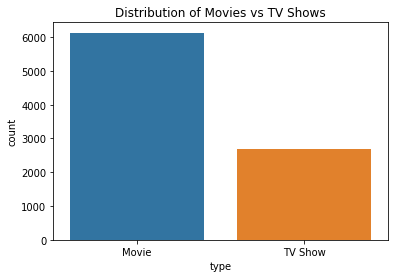

In [72]:
sns.countplot(data=df, x='type')
plt.title("Distrib of Movies and TV Shows")
plt.show()


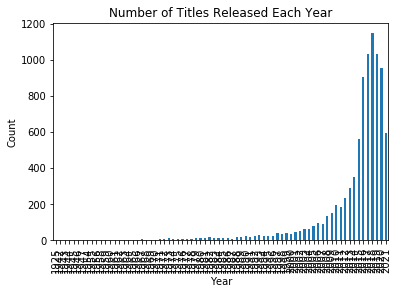

In [73]:
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title("# of Titles Released Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


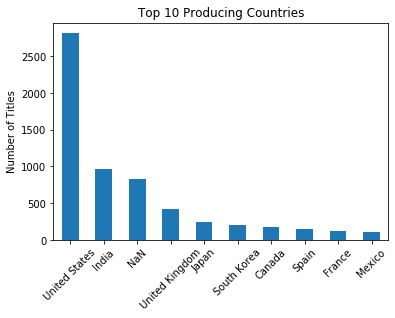

In [74]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Producing Countries")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

In [93]:
def get_individual_actors(df, actor_var, top=10):
    df_cast = df[df[actor_var].notnull()]
    df_cast[actor_var] = df_cast[actor_var].str.split(', ')
    df_actors = df_cast.explode(actor_var)
    return df_actors

In [95]:
movies_per_actor = get_individual_actors(df, 'cast', 10)
movies_per_actor['cast'].value_counts().head(10)

Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: cast, dtype: int64

# Personal Favorites

Let's see if my favorite movies, anime, and K-dramas are present in the dataset.

In [100]:
my_favorites = [
    'One Piece', 'Tokyo Ghoul', 'Vinland Saga', 'Interstellar',
    'Harry Potter', 'Prisoners', 'Lord of the Rings',
    'Itaewon Class', 'Weak Hero', 'Save Me'
]

pattern = '|'.join([re.escape(title) for title in my_favorites])

In [103]:
df_favorites = df[df['title'].str.contains(pattern, case=False, na=False, regex=True)]
df_favorites

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2399,s2400,TV Show,ONE PIECE,NaN,"Mayumi Tanaka, Akemi Okamura, Kazuya Nakai, Ka...",Japan,"June 12, 2020",2002,TV-14,4 Seasons,Anime Series,Monkey D. Luffy sails with his crew of Straw H...
2959,s2960,TV Show,Itaewon Class,NaN,"Park Seo-joon, Kim Da-mi, Yu Jae-myeong, Kwon ...",South Korea,"February 1, 2020",2020,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr...","In a colorful Seoul neighborhood, an ex-con an..."
3074,s3075,TV Show,Save Me,NaN,"Taecyeon, Seo Ye-ji, Cho Seong-ha, Woo Do‑hwan...",South Korea,"January 1, 2020",2017,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Dr...",Four young men come to the rescue of a former ...
4243,s4244,Movie,The Seven Deadly Sins the Movie: Prisoners of ...,Noriyuki Abe,"Yuki Kaji, Sora Amamiya, Misaki Kuno, Aoi Yuki...",Japan,"December 31, 2018",2018,TV-14,100 min,"Action & Adventure, Anime Features, Internatio...",The Seven Deadly Sins aid the Sky People again...
8404,s8405,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...
8405,s8406,Movie,The Lord of the Rings: The Two Towers,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2002,PG-13,179 min,"Action & Adventure, Sci-Fi & Fantasy",Frodo and Sam head to Mordor to destroy the On...


Focus on Japan and South Korea

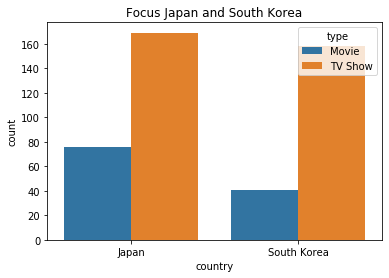

In [105]:
favorites_countries = df[df['country'].isin(['Japan', 'South Korea'])]

sns.countplot(data=favorites_countries, x='country', hue='type')
plt.title("Focus Japan and South Korea")
plt.show()